<a href="https://colab.research.google.com/github/vaishnavinandikanti/Data-Analytics-project-Social_buzz-/blob/main/insuranceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [ ]:
path="/content/drive/MyDrive/Data Analytics minor project-Vehical insurance prediction .csv"
d=pd.read_csv(path)
df=pd.DataFrame(d)
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0


In [ ]:
df.shape

(381109, 12)

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
df['Vehicle_Damage'].replace(['Yes','No'],[1,0],inplace=True)

<ipython-input-3-466523889d48>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vehicle_Damage'].replace(['Yes','No'],[1,0],inplace=True)
<ipython-input-3-466523889d48>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Vehicle_Damage'].replace(['Yes','No'],[1,0],inplace=True)


In [ ]:
df['Gender'].replace(['Male','Female'],[1,0],inplace=True)

<ipython-input-4-bc4b72b23eca>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(['Male','Female'],[1,0],inplace=True)
<ipython-input-4-bc4b72b23eca>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace(['Male','Female'],[1,0],inplace=True)


In [ ]:
df


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,> 2 Years,1,40454,26,217,1
1,2,1,76,1,3,0,1-2 Year,0,33536,26,183,0
2,3,1,47,1,28,0,> 2 Years,1,38294,26,27,1
3,4,1,21,1,11,1,< 1 Year,0,28619,152,203,0
4,5,0,29,1,41,1,< 1 Year,0,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26,1,1-2 Year,0,30170,26,88,0
381105,381106,1,30,1,37,1,< 1 Year,0,40016,152,131,0
381106,381107,1,21,1,30,1,< 1 Year,0,35118,160,161,0
381107,381108,0,68,1,14,0,> 2 Years,1,44617,124,74,0


In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  int64 
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  int64 
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 34.9+ MB


In [ ]:
df.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.540761,38.822584,0.997869,26.388807,0.458210,0.504877,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,0.499977,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df['Response'].value_counts()

,count
Response,
0,334399
1,46710


In [ ]:
df["Vehicle_Age"].replace(["< 1 Year","1-2 Year","> 2 Years"],[0,1,2],inplace=True)
df

<ipython-input-10-ed8a5b7e1cf9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Vehicle_Age"].replace(["< 1 Year","1-2 Year","> 2 Years"],[0,1,2],inplace=True)
<ipython-input-10-ed8a5b7e1cf9>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Vehicle_Age"].replace(["< 1 Year","1-2 Year","> 2 

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,40454,26,217,1
1,2,1,76,1,3,0,1,0,33536,26,183,0
2,3,1,47,1,28,0,2,1,38294,26,27,1
3,4,1,21,1,11,1,0,0,28619,152,203,0
4,5,0,29,1,41,1,0,0,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26,1,1,0,30170,26,88,0
381105,381106,1,30,1,37,1,0,0,40016,152,131,0
381106,381107,1,21,1,30,1,0,0,35118,160,161,0
381107,381108,0,68,1,14,0,2,1,44617,124,74,0


In [ ]:
df.corr()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.000999,0.001561,-0.000564,-0.000572,0.002457,0.000878,-0.001507,0.003027,-0.002837,-0.000630,-0.001368
Gender,0.000999,1.000000,0.145545,-0.018374,0.000604,-0.081932,0.160427,0.091606,0.003673,-0.111159,-0.002517,0.052440
Age,0.001561,0.145545,1.000000,-0.079782,0.042574,-0.254682,0.765790,0.267534,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.018374,-0.079782,1.000000,-0.001081,0.014969,-0.037306,-0.016622,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.000604,0.042574,-0.001081,1.000000,-0.024659,0.043778,0.028235,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.081932,-0.254682,0.014969,-0.024659,1.000000,-0.380873,-0.824143,0.004269,0.219381,0.002537,-0.341170
Vehicle_Age,0.000878,0.160427,0.765790,-0.037306,0.043778,-0.380873,1.000000,0.396873,0.041580,-0.550663,-0.001892,0.221874
Vehicle_Damage,-0.001507,0.091606,0.267534,-0.016622,0.028235,-0.824143,0.396873,1.000000,0.009349,-0.224377,-0.002064,0.354400
Annual_Premium,0.003027,0.003673,0.067507,-0.011906,-0.010588,0.004269,0.041580,0.009349,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.111159,-0.577826,0.043731,-0.042420,0.219381,-0.550663,-0.224377,-0.113247,1.000000,0.000002,-0.139042


In [ ]:
# Define the feature set and the target variable
X = df.drop(columns=['id', 'Response'])
y = df['Response']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(304887, 10) (76222, 10) (304887,) (76222,)


In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train[['Age', 'Annual_Premium', 'Vintage']])

# Transform the test data
X_test_scaled = scaler.transform(X_test[['Age', 'Annual_Premium', 'Vintage']])

# Replace the original columns with the scaled ones
X_train[['Age', 'Annual_Premium', 'Vintage']] = X_train_scaled
X_test[['Age', 'Annual_Premium', 'Vintage']] = X_test_scaled


In [ ]:
# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.8741701870850935
Precision: 0.22580645161290322
Recall: 0.002940249921243306
F1 Score: 0.005804913444594175
ROC AUC Score: 0.5007504739913416
Confusion Matrix:
[[66603    96]
 [ 9495    28]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


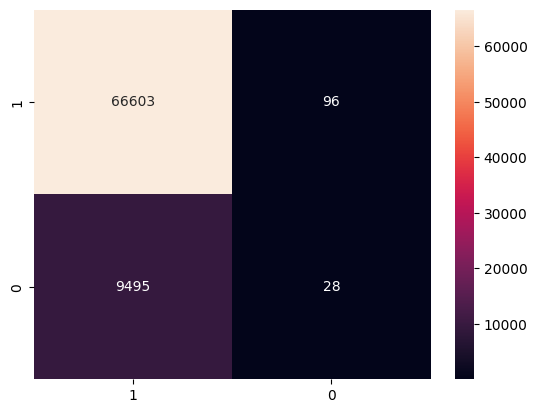

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm = pd.DataFrame(data=cm,columns=[1,0],index=[1,0])
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

Confusion Matrix
A confusion matrix is a tool used to evaluate the performance of a classification model. It shows the relationship between the actual and predicted classes. Here's a general structure of a confusion matrix:

Predicted: No	Predicted: Yes
Actual: No	True Negative (TN) 	False Positive (FP)
Actual: Yes	False Negative (FN)	True Positive (TP)



Terms in a Confusion Matrix
True Positive (TP): The model correctly predicts the positive class (e.g., the vehicle owner will make an insurance claim).
True Negative (TN): The model correctly predicts the negative class (e.g., the vehicle owner will not make an insurance claim).
False Positive (FP): The model incorrectly predicts the positive class (e.g., the model predicts that the vehicle owner will make an insurance claim, but they actually don't).
False Negative (FN): The model incorrectly predicts the negative class (e.g., the model predicts that the vehicle owner will not make an insurance claim, but they actually do).


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Interpret the results
print(y_pred)


[0 0 0 ... 0 0 0]
